In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.integrate import quad

In [16]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]
print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(2.0, 5.0, 100)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5
 3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2
 4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9
 4.95 5.  ]


In [17]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [18]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
# d_vals = np.linspace(dlowlim, dhighlim, num_ds)
# d_vals[0] = 1e-10 # set d=0 to a small value
# initialize d_vals as 50 2.0s
d_vals = np.ones(num_ds)*2.0
print(d_vals)

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [19]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


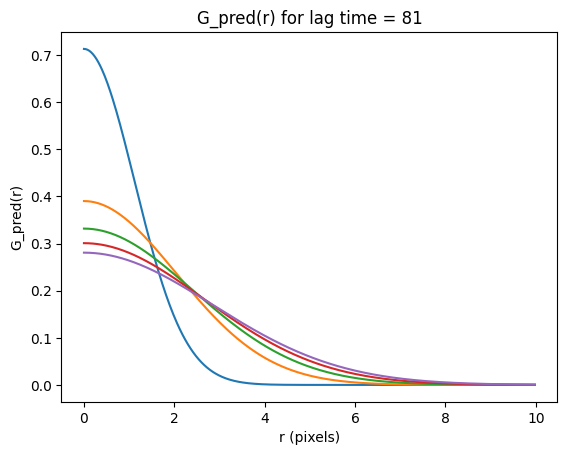

In [20]:
############### check this step ################
# G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

# G_pred[G_pred < 1e-5] = 0.0

# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(r_vals, G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()
# print(G_pred[1, :])

In [21]:
# # apply fft on r to get G_pred_k(t, k)
# G_pred_k = fft.fft(G_pred, axis=1).real
# print(f"shape of G_pred after fft : {G_pred.shape}")
# # for i in range(0, num_frames):
# #     G_pred_k[i] -= min(G_pred_k[i])
# # print(f"max value of G_pred : {np.max(G_pred)}")

In [22]:
# write code for fourier transform of G_pred in r to get G_pred_k(t, k)
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

G_pred_k = np.zeros((num_frames, k_vals.shape[0]))

dr = r_vals[2]-r_vals[1]

for i in range(0, num_frames):
    for j,k in enumerate(k_vals):
        integral = np.sum(G_pred[i, :]*np.exp(-1j*k*r_vals)) * dr
        G_pred_k[i, j] = integral.real

(500,)


In [23]:
# get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
# k_vals = fft.fftshift(k_vals)
# G_pred_k = fft.fftshift(G_pred_k, axes=1)
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

shape of k_vals : (500,)


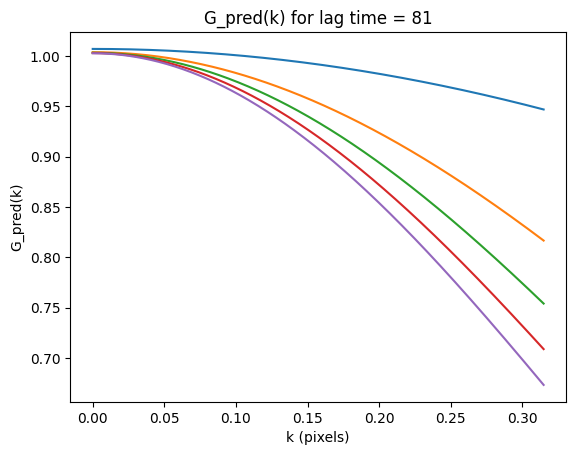

In [24]:
# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(k_vals, G_pred_k[i, :])
    plt.xlabel("k (pixels)")
    plt.ylabel("G_pred(k)")
    plt.title(f"G_pred(k) for lag time = {i}")
    # plt.show()
plt.show()
# print(G_pred_k[1, :])

In [25]:
# laplace transform of G_pred_k(t, k) on time to get u_pred(s, k)
u_pred = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred_k[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)

# normalize the u_pred
# print(np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)[0])
u_pred = u_pred / np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)
# print(u_pred[0][-1])
# u_pred += 0.04

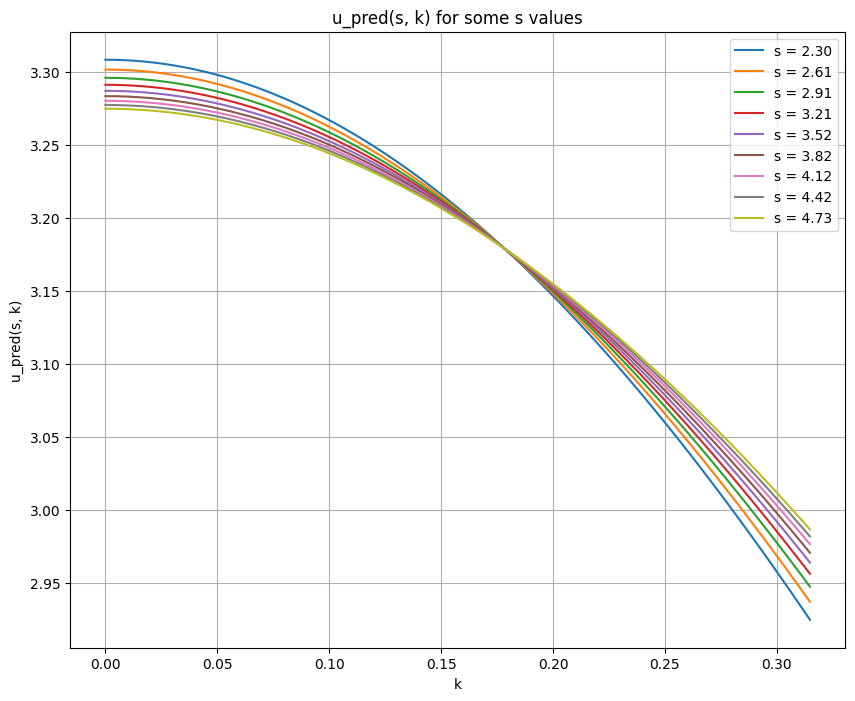

In [26]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_pred(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [27]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [28]:
# calculate Z
# $Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$
Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            Z[i, j, k, :] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]) + d_vals[j]*k_vals**2)
# normalize Z to have integral of Z over k equal to 1
norm = np.trapz(Z, k_vals, axis=3).reshape(alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], 1)
Z = Z / norm
print(f"shape of Z : {Z.shape}")
print(f"max value of Z : {np.max(Z)}")
print(f"min value of Z : {np.min(Z)}")
print(f"mean value of Z : {np.mean(Z)}\n")

print(f"max value of u_pred : {np.max(u_pred)}")
print(f"min value of u_pred : {np.min(u_pred)}")
print(f"mean value of u_pred : {np.mean(u_pred)}")

shape of Z : (10, 50, 100, 500)
max value of Z : 3.3765231189227793
min value of Z : 2.818033816545177
mean value of Z : 3.1766257894061307

max value of u_pred : 3.3167310419129934
min value of u_pred : 2.9097015606913854
mean value of u_pred : 3.176628117301313


In [29]:
# save the data to Z.npy
np.save("Z.npy", Z)